In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from ipywidgets import  fixed
import ipywidgets as widgets
import ipywidgets as interactive
plt.rcParams['figure.figsize'] = [16,8]
from IPython.display import clear_output

In [3]:
df_orig = pd.read_csv('./311.csv', low_memory=False)

In [4]:
df = df_orig.copy(deep=True)

In [5]:
df['open_dt'] = pd.to_datetime(df['open_dt'],format='%Y-%m-%d %H:%M:%S')
df['sla_target_dt'] = pd.to_datetime(df['sla_target_dt'],format='%Y-%m-%d %H:%M:%S')
df['closed_dt'] = pd.to_datetime(df['closed_dt'],format='%Y-%m-%d %H:%M:%S')

Difference in requests by years

<Axes: title={'center': 'Average Requests Per Month by Year'}, xlabel='year', ylabel='count'>

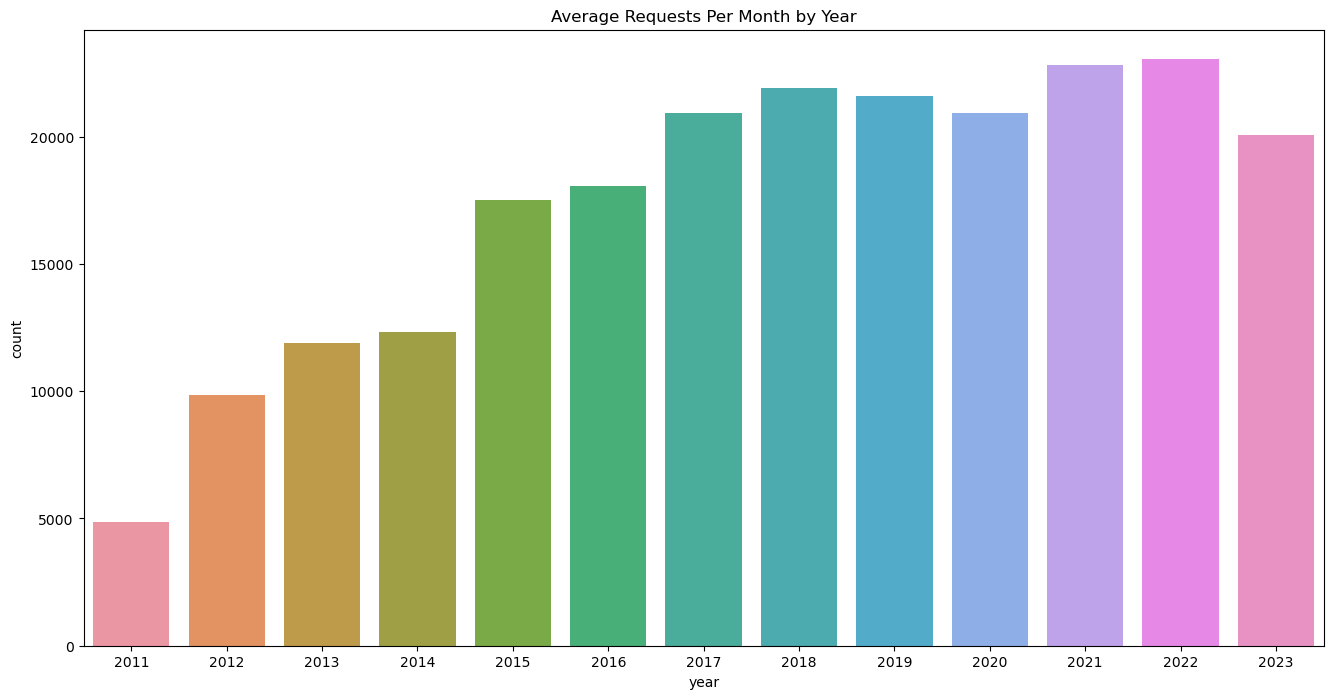

In [6]:
average_requests_by_year = df.groupby(df['open_dt'].dt.year)['open_dt'].count()
average_requests_by_year = average_requests_by_year.to_frame()
average_requests_by_year.columns = ['count']
average_requests_by_year['year'] = average_requests_by_year.index
average_requests_by_year = average_requests_by_year.reset_index(drop=True)
average_requests_by_year['count'] = average_requests_by_year['count'] / 12
average_requests_by_year['count'] = average_requests_by_year['count'].astype(int)
plt.figure(figsize=(16,8))
plt.title('Average Requests Per Month by Year')
sns.barplot(x='year', y='count', data=average_requests_by_year)




Requests by Month

<Axes: title={'center': 'Average Requests Per Week by Month'}, xlabel='month', ylabel='count'>

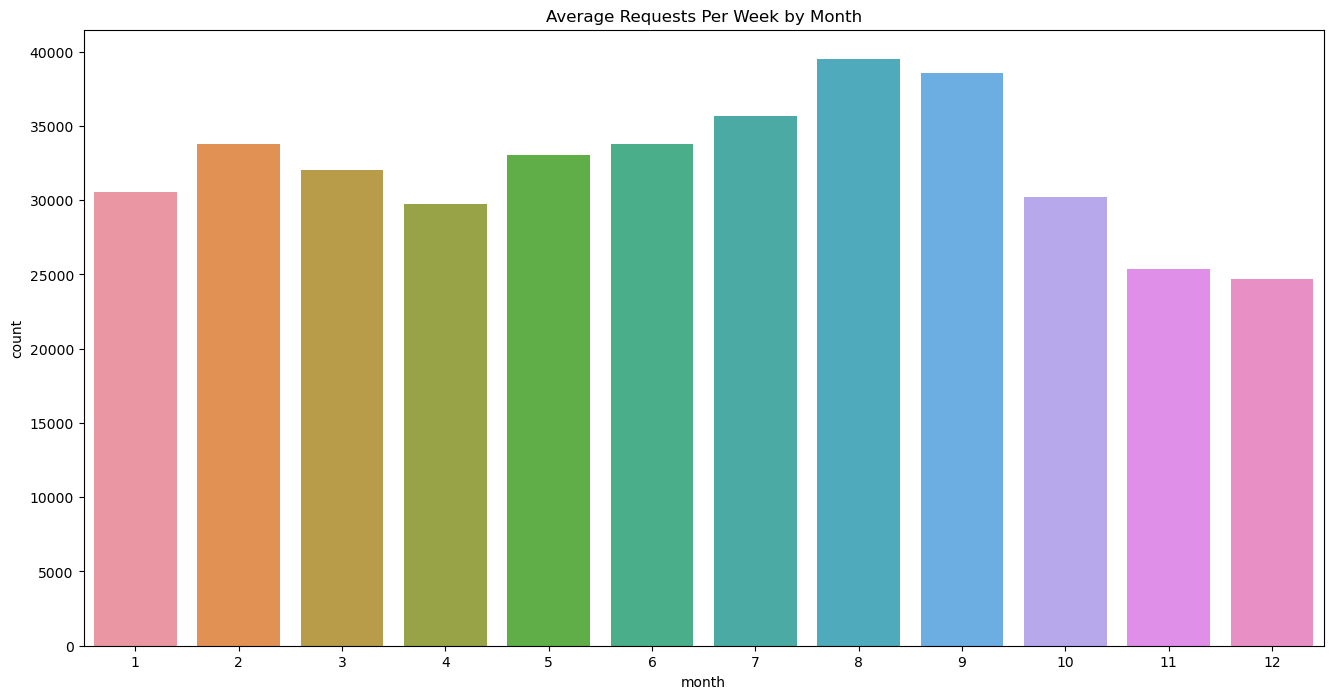

In [7]:
average_requests_by_month = df.groupby(df['open_dt'].dt.month)['open_dt'].count()
average_requests_by_month = average_requests_by_month.to_frame()
average_requests_by_month.columns = ['count']
average_requests_by_month['month'] = average_requests_by_month.index
average_requests_by_month = average_requests_by_month.reset_index(drop=True)
average_requests_by_month['count'] = average_requests_by_month['count'] / 7
average_requests_by_month['count'] = average_requests_by_month['count'].astype(int)
plt.figure(figsize=(16,8))
plt.title('Average Requests Per Week by Month')
#change month so it says the month name and not the number for every month

sns.barplot(x='month', y='count', data=average_requests_by_month)


On-Time vs. Overdue Cases

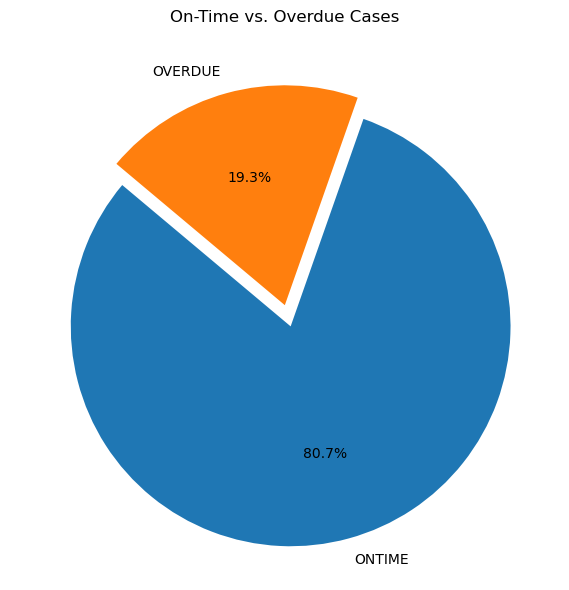

In [8]:
on_time_counts = df['on_time'].value_counts()

plt.figure(figsize=(8, 6))
on_time_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, explode=(0.1, 0))
plt.title('On-Time vs. Overdue Cases')
plt.ylabel('')  
plt.tight_layout()

plt.show()

Top 5 requests by zipcode

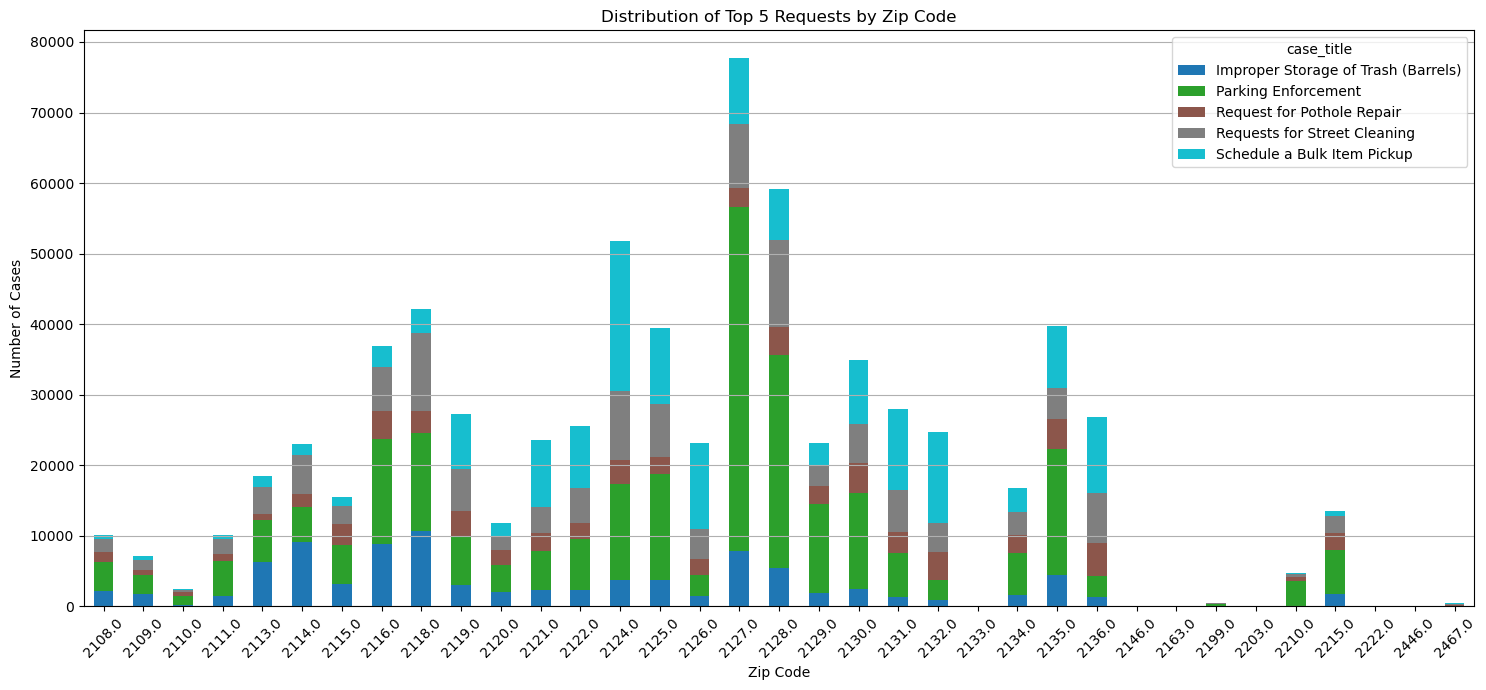

In [9]:
top_5_case_titles = df['case_title'].value_counts().head(5).index.tolist()
filtered_data = df[df['case_title'].isin(top_5_case_titles)]
grouped_data = filtered_data.groupby(['location_zipcode', 'case_title']).size().unstack().fillna(0)
df['location_zipcode'] = df['location_zipcode'].astype(str)
df['location_zipcode'] = df['location_zipcode'].str.replace('.0$', '', regex=True)
df['location_zipcode'] = df['location_zipcode'].str.zfill(5)
grouped_data.plot(kind='bar', stacked=True, figsize=(15, 7), colormap="tab10")
plt.title('Distribution of Top 5 Requests by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

plt.show()
#by percentage


Average resolution time by zip code

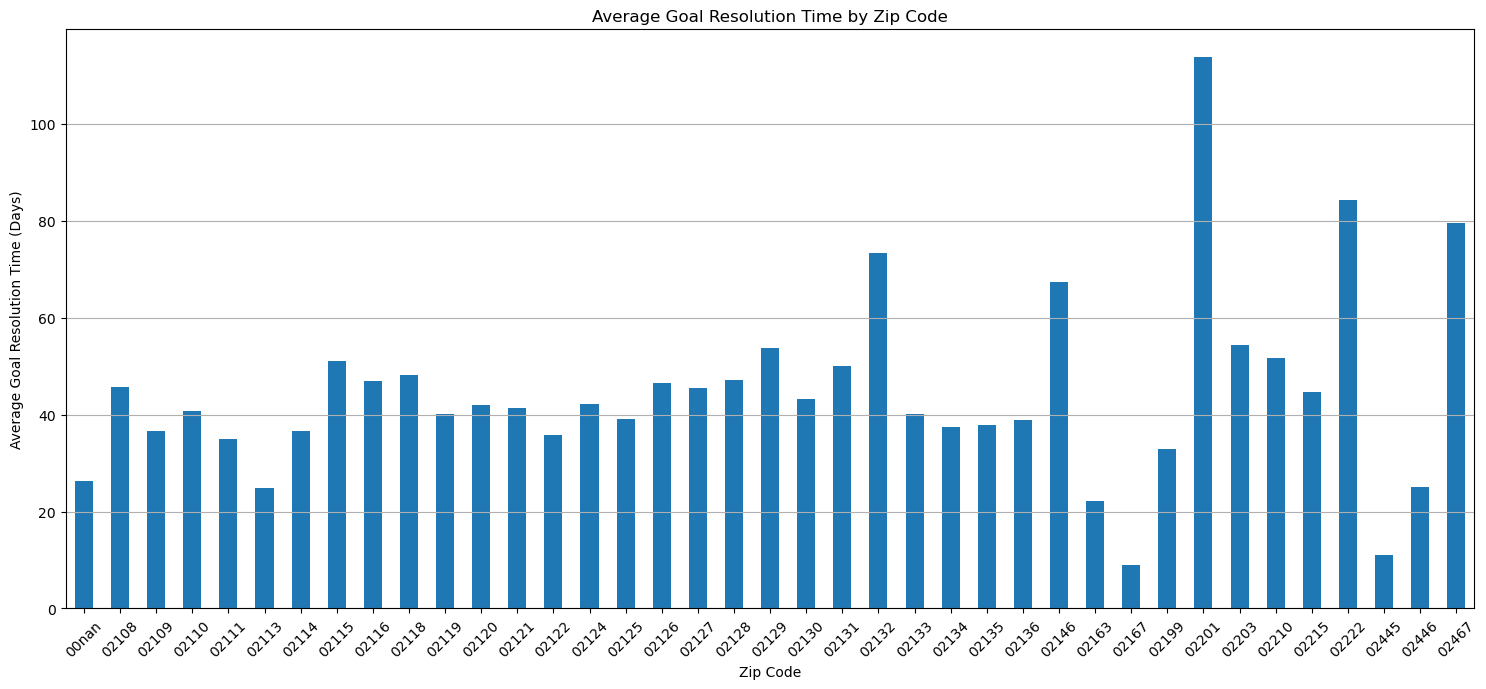

In [10]:
df['sla_target_dt'] = pd.to_datetime(df['sla_target_dt'])
df['goal_resolution_time'] = (df['sla_target_dt'] - df['open_dt']).dt.days
avg_resolution_by_zip = df.groupby('location_zipcode')['goal_resolution_time'].mean().dropna()
df['location_zipcode'] = df['location_zipcode'].astype(str)
df['location_zipcode'] = df['location_zipcode'].str.replace('.0$', '', regex=True)
df['location_zipcode'] = df['location_zipcode'].str.zfill(5)
plt.figure(figsize=(15, 7))
avg_resolution_by_zip.plot(kind='bar')
plt.title('Average Goal Resolution Time by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Average Goal Resolution Time (Days)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

plt.show()


How does case submission channel source change by zip code?

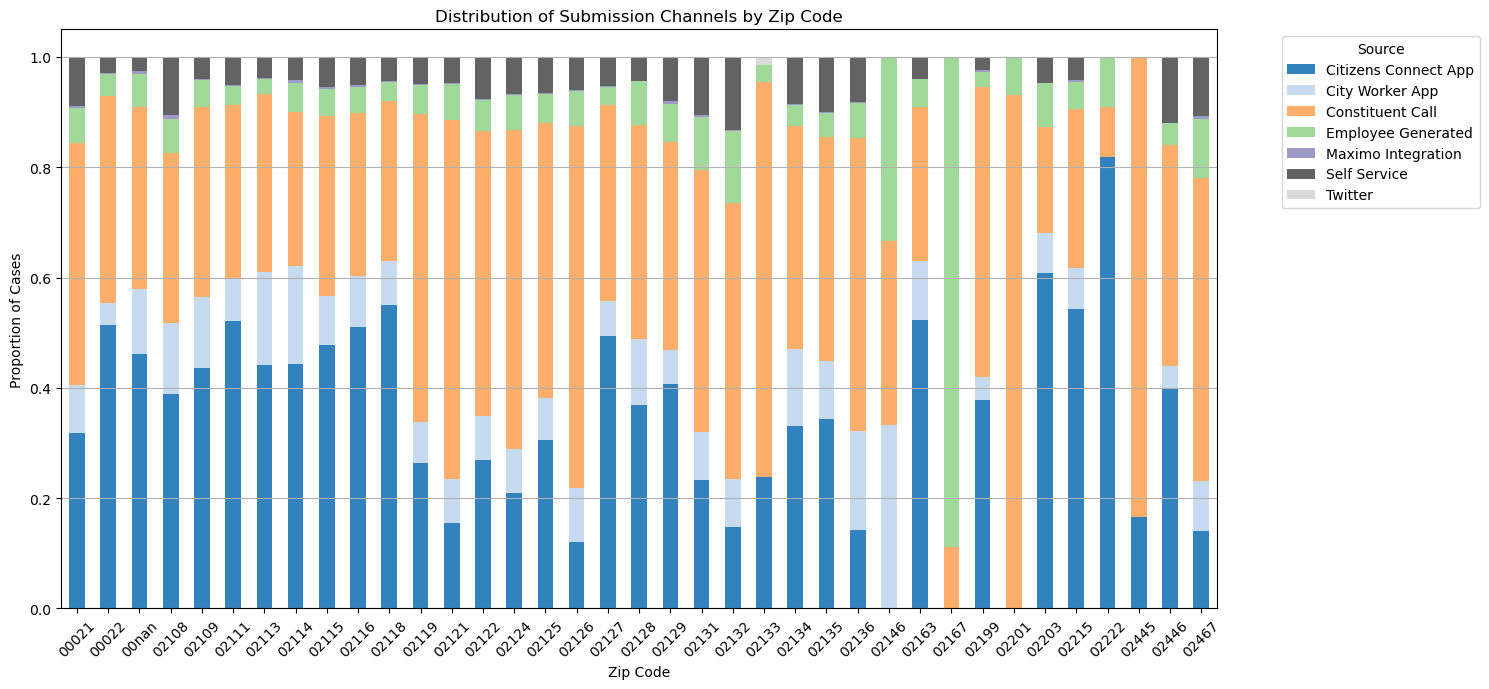

In [11]:
grouped_by_zip_source = df.groupby(['location_zipcode', 'source']).size().unstack().fillna(0)
normalized_data = grouped_by_zip_source.div(grouped_by_zip_source.sum(axis=1), axis=0)
df['location_zipcode'] = df['location_zipcode'].astype(str)
df['location_zipcode'] = df['location_zipcode'].str.replace('.0$', '', regex=True)
df['location_zipcode'] = df['location_zipcode'].str.zfill(5)
normalized_data.plot(kind='bar', stacked=True, figsize=(15, 7), colormap="tab20c")
plt.title('Distribution of Submission Channels by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Proportion of Cases')
plt.xticks(rotation=45)
plt.legend(title='Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()







plt.show()
#label with actual percentages
#make a map by zipcode
#make zipcode into a string and 0


How does distribution of submission channels change year by year?

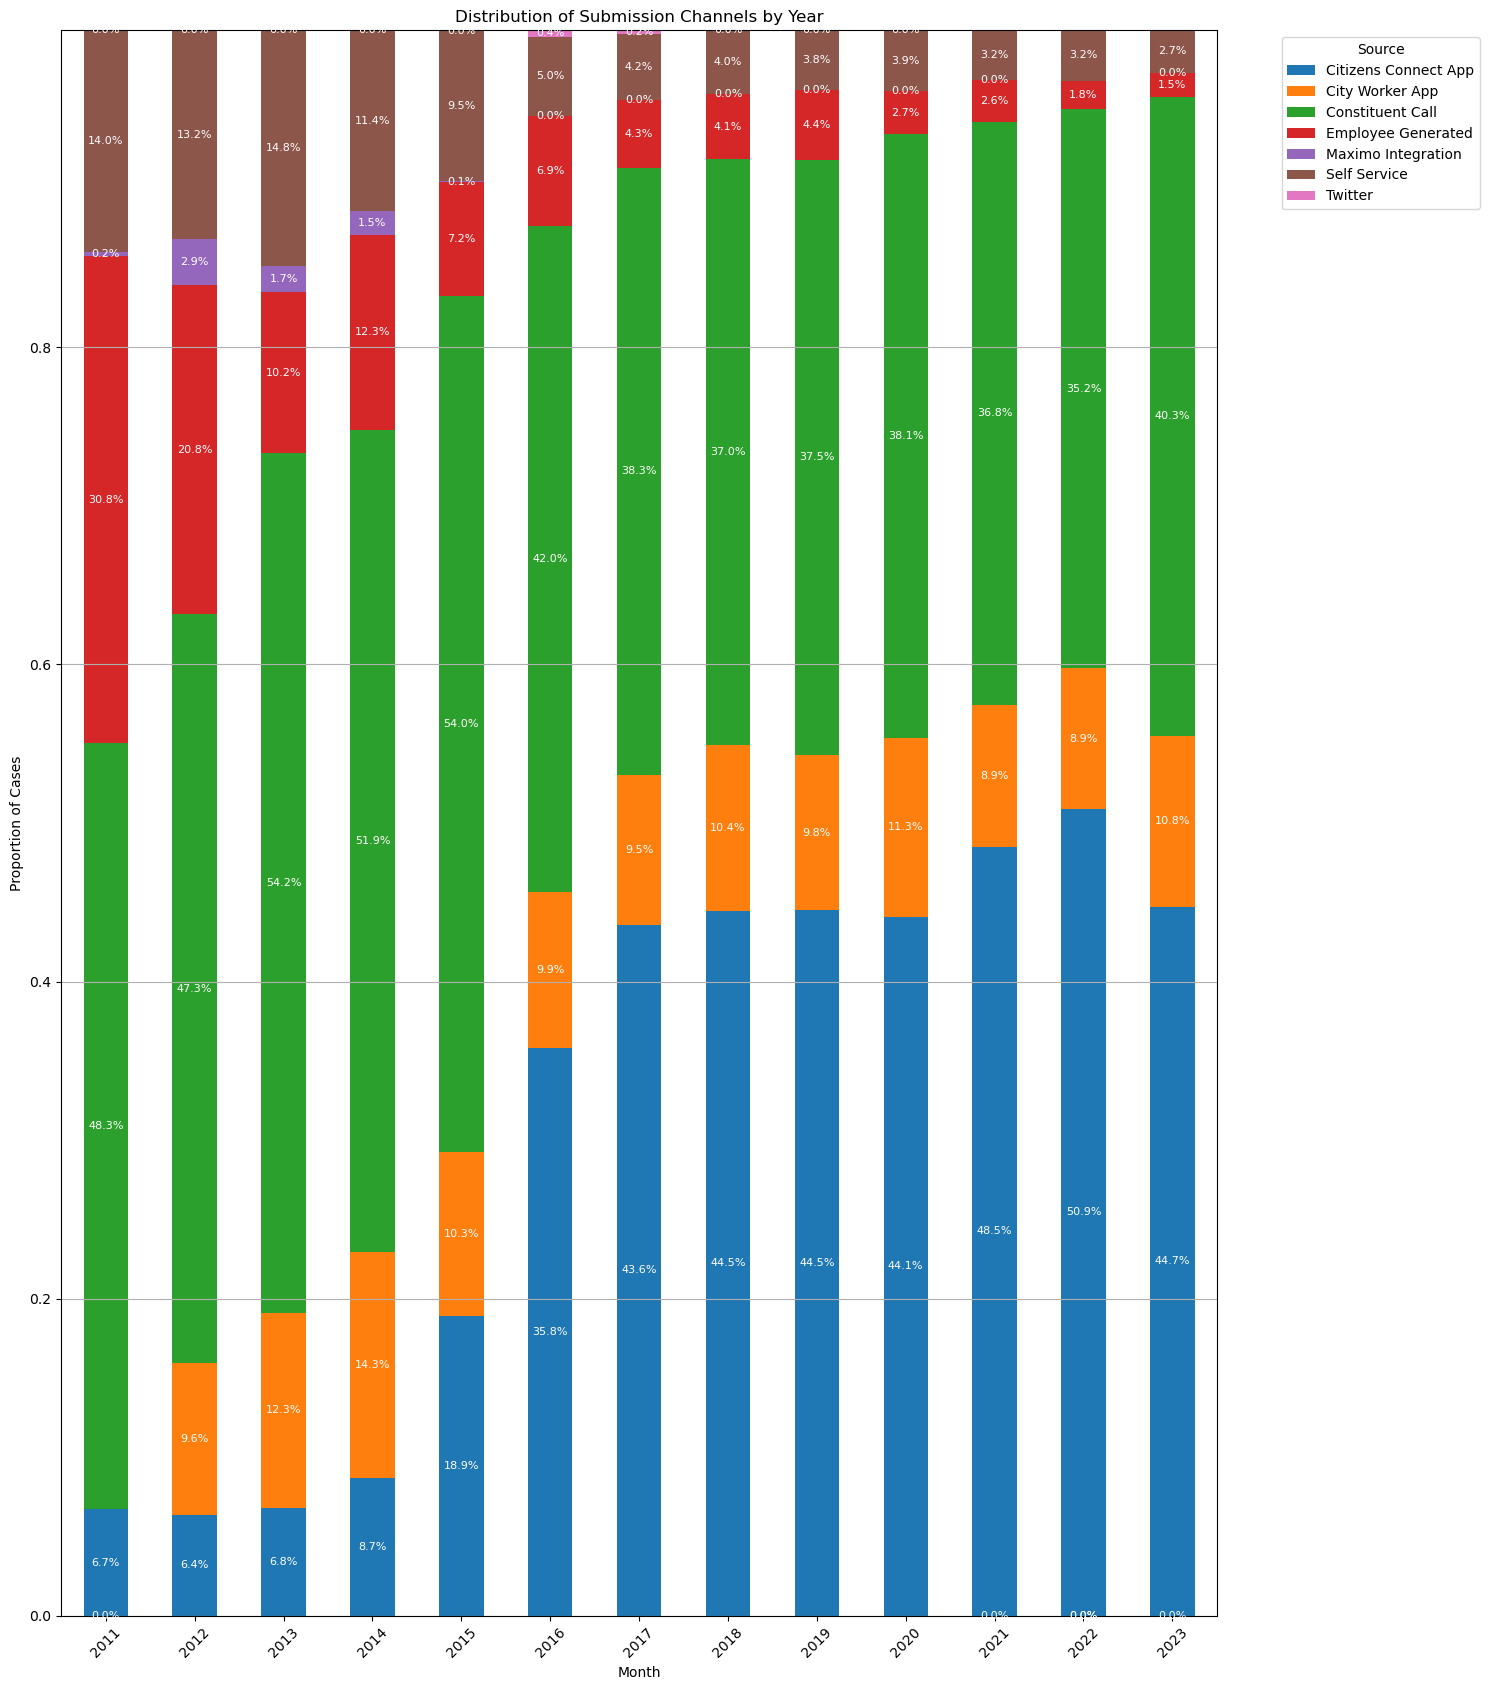

In [12]:
grouped_by_year_source = df.groupby([df['open_dt'].dt.to_period('Y'), 'source']).size().unstack().fillna(0)
normalized_year_data = grouped_by_year_source.div(grouped_by_year_source.sum(axis=1), axis=0)
ax = normalized_year_data.plot(kind='bar', stacked=True, figsize=(15, 17))
plt.title('Distribution of Submission Channels by Year')
plt.xlabel('Month')
plt.ylabel('Proportion of Cases')
plt.xticks(rotation=45)
plt.legend(title='Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()

for i, rec in enumerate(ax.patches):
    height = rec.get_height()
    ax.text(rec.get_x() + rec.get_width() / 2, 
            rec.get_y() + height / 2, 
            f"{height:.1%}", 
            ha='center', 
            va='center', 
            fontsize=8,
            color = 'white')

plt.show()

